## Machine Learning Project

## Questions

## 1. Your views about the problem statement?

The problem lies in the fact that a company called TechWorks Consulting wants to create a machine learning model to determine the salaries of hired workers. It is very important for companies to ensure fair and fair wages for their employees. The machine learning model can provide objective data on this problem based on several factors such as college, experience, Role, previous CTC and academic records. My role as a data analyst is to create an effective machine learning model or approximate model and evaluate its performance.

## 2. What will be your approach to solving this task?

My approach to solving this task is as follows:

## 1. Data Preprocessing:

Convert "College" into a numerical data type based on the tier of the college.

Convert the "City" field into numerical data (0 for non-metro, 1 for metro cities).

Create dummy variable for "Role" fields.

Perform Exploratory Data Analysis (EDA) and check for null values.

Visualize various graphs to find outliers.

Identify outliers using percentiles (e.g., 99th and 1st percentiles) and consider them as potential outliers.

Treat outliers by replacing them with the mean if outliers are present.

## 2. Model Selection:

Choose an appropriate regression model for predicting salary.

Consider regression models like Linear Regression, Ridge Regression, Lasso Regression, Decision Tree Regression, Random Forest Regressor, XG Boost Regressor, Bagging Regressor.

I also do Standardisation of data for models.

Try multiple models to assess their performance.

## 3. Model Training and Evaluation:

Split the data into train and test datasets.
Train the particular model on the training dataset.
Evaluate the model's performance using metrics like R-Squared and Mean Squared Error.
Select the model with the best performance.

## 4. Model Optimization:

Optimize the model with cross-validation and hyperparameters.

For Ridge and Lasso Regression, use the validation curve to tune the hyperparameters.

For Decision Tree Regression, Random Forest, XGB Regressor, Bagging Regressor use GridSearchCV with parameter grids for max depth, min sample split, and min sample leaf.

## 5. Conclusion or Result:

After performing the all model and get the result I will choose the best model according to R2 score and Mean Squared Error (MSE).

Model which have High R2 score and Less MSE is the best one.

## 3. What were the available ML model options you had to perform this task?

For predicting employee salaries, we considered various regression models:

For predicting employee salaries, we considered a range of regression models. Each model offers unique characteristics and advantages for different scenarios:

## 1.Simple Linear Regression:

Suitable when there's a straight forward, linear relationship between one feature and salary.

## 2.Multiple Linear Regression:

Useful when multiple features influence salary, allowing for more complex relationships to be considered.

## 3.Ridge Regression:

Prevents overfitting by adding a penalty term, making it ideal for handling multicollinearity among features.
    
## 4.Lasso Regression:

Combats overfitting and aids feature selection by encouraging some features to have zero influence on salary prediction.
    
## 5.Decision Tree Regression:

A non-linear model that captures complex relationships when the salary prediction is not linear.
    
## 6.Random Forest Regressor:

An ensemble learning model that combines multiple decision trees to improve predictive performance.
    
## 7.XG Boost Regressor:

A gradient boosting model known for its high predictive power and computational efficiency.
    
## 8.Bagging Regressor:

Utilizes Bootstrap Aggregating to create an ensemble of multiple decision tree regressors for enhanced prediction accuracy.

To determine the best model, I will test each item and estimate its performance using metrics such as mean-squared and mean squared error. The best predictive accuracy model will be chosen for future adaptation.

## 4. Which model’s performance is best and what could be the possible reason for that?

## Random Forest Regressor:
Best Hyperparameters:  {'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}


R-squared (R^2) - Train: 0.8973, Test: 0.6551


Mean Squared Error (MSE) - Train: 16518254.6464, Test: 51174778.1652


## 5. What steps can you take to improve this selected model’s performance even further?

To further enhance the performance of the selected model, I took the following steps:

## Validation Curve for Ridge and Lasso Regression:

For Ridge regression, I used a validation curve to explore different values of alpha. This helped me identify the optimal alpha value that balances bias and variance effectively.

The best alpha for Ridge regression was found to be approximately 10.72.

For Lasso regression, a similar validation curve was employed to determine the best alpha. The optimal alpha for Lasso regression was approximately 86.97.

These optimal alpha values are crucial for regularizing the model and preventing overfitting.

## GridSearchCV for Tree Regression:

To further improve the performance of the Decision Tree Regression model, I utilized GridSearchCV. This technique systematically searches through a range of hyperparameters to find the best combination that optimizes model performance.
The best hyperparameters for the Decision Tree Regression model were identified as follows:

'max_depth': 4

'min_samples_leaf': 1

'min_samples_split': 2

Random Forest Regressor achieved the best hyperparameters with a max depth of 30 and 300 estimators.

XG Boost Regressor was optimized with a learning rate of 0.01, max depth of 3, and 300 estimators.

Bagging Regressor was configured with 200 decision tree estimators.

By performing these steps, I have fine-tuned the model and optimized its hyperparameters to increase its efficiency and accuracy in making predictions.

## Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sn
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import validation_curve
from sklearn.datasets import load_iris
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import preprocessing
from sklearn import tree
from IPython.display import Image
import pydotplus
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from xgboost import XGBRegressor

## Import data

In [2]:
# Load the dataset
df=pd.read_csv("E:\\Internsala Data\\Machine_Learning\\Project\\ML case Study.csv")
college = pd.read_csv("E:\\Internsala Data\\Machine_Learning\\Project\\Colleges.csv")
cities = pd.read_csv("E:\\Internsala Data\\Machine_Learning\\Project\\cities.csv")

In [3]:
# Display the first few rows of the dataset to understand its structure
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,SVNIT Surat,Asansol,Manager,55523.0,3,66,19,71406.58
1,NIT Bhopal,Ajmer,Executive,57081.0,1,84,18,68005.87
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010.0,2,81,33,82092.39
4,DTU,Durgapur,Executive,57879.0,4,74,32,73878.10


In [4]:
# Display the first few rows of the college dataset to understand its structure
college.head()

,Tier 1,Tier 2,Tier 3
0,IIT Bombay,IIIT Bangalore,"Ramaiah Institute of Technology, Bengaluru"
1,IIT Delhi,IIIT Delhi,TIET/Thapar University
2,IIT Kharagpur,IGDTUW,Manipal Main Campus
3,IIT Madras,NIT Calicut,VIT Vellore
4,IIT Kanpur,IIITM Gwalior,SRM Main Campus


In [5]:
# Display the first few rows of the cities dataset to understand its structure
cities.head()

,Metrio City,non-metro cities
0,Mumbai,Dehradun
1,Delhi,Durgapur
2,Kolkata,Asansol
3,Chennai,Rourkela
4,Bangalore,Kozhikode


## Extract Data

In [6]:
# Extract data in separate lists Tier1, Tier2, and Tier3 for further analysis.
Tier1 = college["Tier 1"].tolist()
Tier2 = college["Tier 2"].tolist()
Tier3 = college["Tier 3"].tolist()
# Display the Tier1 dataset
Tier1

['IIT Bombay',
 'IIT Delhi',
 'IIT Kharagpur',
 'IIT Madras',
 'IIT Kanpur',
 'IIT Roorkee',
 'IIT Guwahati',
 'IIIT Hyderabad',
 'BITS Pilani (Pilani Campus)',
 'IIT Indore',
 'IIT Ropar',
 'IIT BHU (Varanasi)',
 'IIT ISM Dhanbad',
 'DTU',
 'NSUT Delhi (NSIT)',
 'NIT Tiruchipally (Trichy)',
 'NIT Warangal',
 'NIT Surathkal (Karnataka)',
 'Jadavpur University',
 'BITS Pilani (Hyderabad Campus)',
 'BITS Pilani (Goa Campus)',
 'IIIT Allahabad',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

In [7]:
# Assign tier values to colleges in the DataFrame based on their tier classification
# - If a college is in 'Tier1', set its value to 1
# - If a college is in 'Tier2', set its value to 2
# - If a college is in 'Tier3', set its value to 3
for item in df.College:
    if item in Tier1:
        df["College"].replace(item,1,inplace=True)
    elif item in Tier2:
        df["College"].replace(item,2,inplace=True)
    elif item in Tier3:
        df["College"].replace(item,3,inplace=True)

In [8]:
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,2,Asansol,Manager,55523.0,3,66,19,71406.58
1,2,Ajmer,Executive,57081.0,1,84,18,68005.87
2,3,Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02
3,3,Ajmer,Executive,49010.0,2,81,33,82092.39
4,1,Durgapur,Executive,57879.0,4,74,32,73878.10


In [9]:
# Extracting lists of metropolitan and non-metropolitan cities from the 'cities' DataFrame
metro = cities['Metrio City'].tolist()
non_metro_cities = cities['non-metro cities'].tolist()

In [10]:
# Repeating previpus steps and assigning value as 1 if city is merto and 0 if non metro
for item in df.City:
    if item in metro:
        df['City'].replace(item,1,inplace=True)
    elif item in non_metro_cities:
        df['City'].replace(item,0,inplace=True)

In [11]:
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,2,0,Manager,55523.0,3,66,19,71406.58
1,2,0,Executive,57081.0,1,84,18,68005.87
2,3,0,Executive,60347.0,2,52,28,76764.02
3,3,0,Executive,49010.0,2,81,33,82092.39
4,1,0,Executive,57879.0,4,74,32,73878.10


## Data Preprocessing

In [12]:
# Checking missing values
df.isna().sum()

College                0
City                   0
Role                   0
Previous CTC           0
Previous job change    0
Graduation Marks       0
EXP (Month)            0
CTC                    0
dtype: int64

In [13]:
# Information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   College              1589 non-null   int64  
 1   City                 1589 non-null   int64  
 2   Role                 1589 non-null   object 
 3   Previous CTC         1589 non-null   float64
 4   Previous job change  1589 non-null   int64  
 5   Graduation Marks     1589 non-null   int64  
 6   EXP (Month)          1589 non-null   int64  
 7   CTC                  1589 non-null   float64
dtypes: float64(2), int64(5), object(1)
memory usage: 99.4+ KB


In [14]:
# Statistical info about numerical data
df.describe()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
count,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000
mean,1.975456,0.514160,55518.453744,2.528634,59.855255,39.044682,75353.278798
std,0.838330,0.499957,6655.218445,1.123918,14.935139,14.108875,12587.288237
min,1.000000,0.000000,36990.000000,1.000000,35.000000,18.000000,53020.320000
25%,1.000000,0.000000,50518.000000,2.000000,46.000000,26.000000,66902.350000
50%,2.000000,1.000000,55291.000000,3.000000,60.000000,39.000000,73028.670000
75%,3.000000,1.000000,60109.000000,4.000000,73.000000,51.000000,80588.670000
max,3.000000,1.000000,77911.000000,4.000000,85.000000,64.000000,123416.990000


In [15]:
# Converting Categorical column Role into numerical
df = pd.get_dummies(df,drop_first=True,dtype=int)
df.head()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
0,2,0,55523.0,3,66,19,71406.58,1
1,2,0,57081.0,1,84,18,68005.87,0
2,3,0,60347.0,2,52,28,76764.02,0
3,3,0,49010.0,2,81,33,82092.39,0
4,1,0,57879.0,4,74,32,73878.10,0


## Checking Outliers

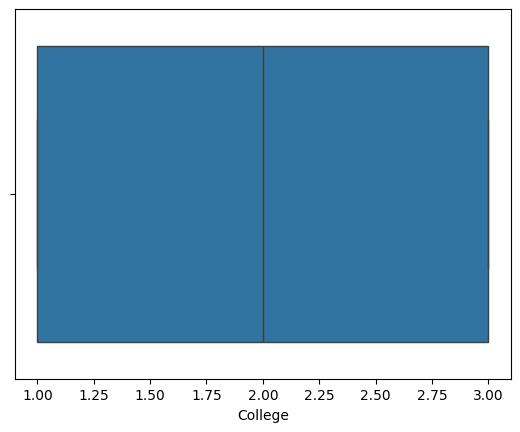

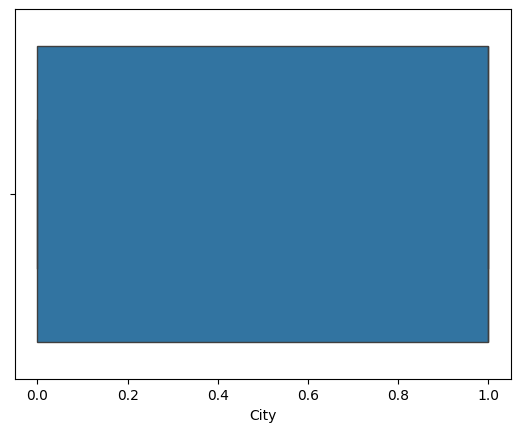

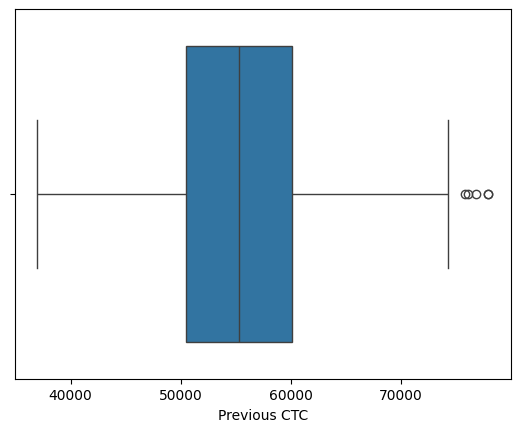

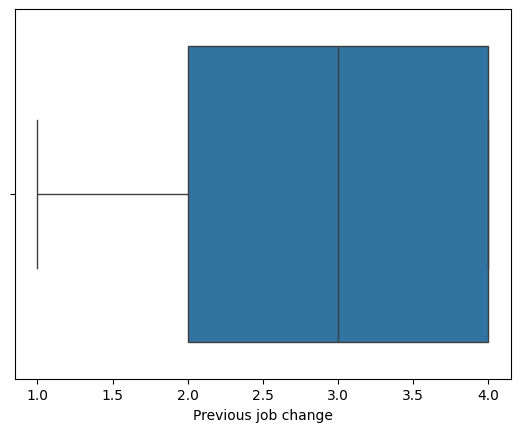

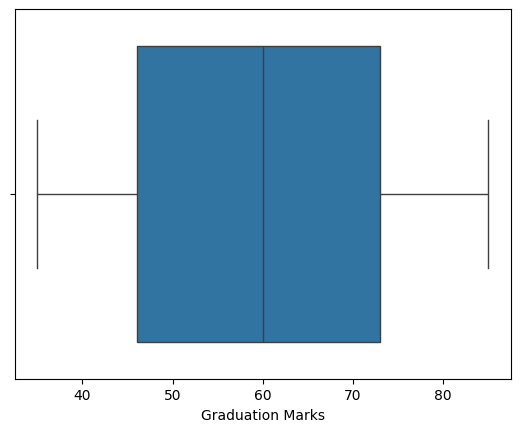

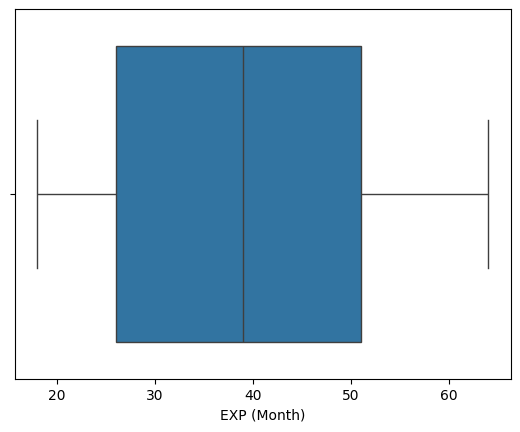

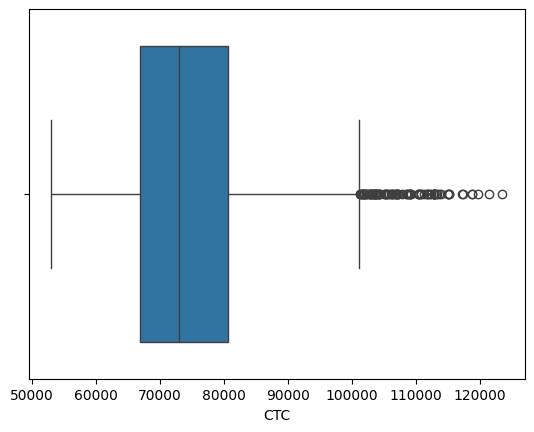

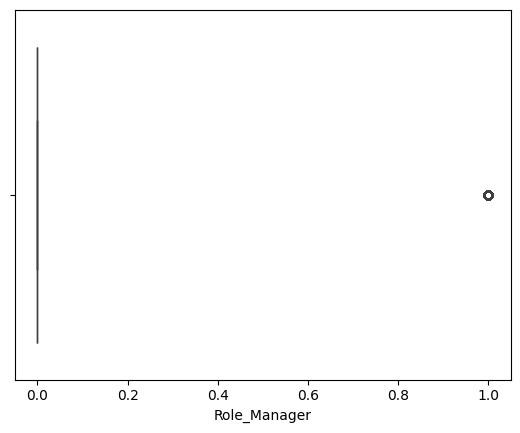

In [16]:
for col in df.select_dtypes(include=np.number).columns:
  sns.boxplot(x=df[col])
  plt.show()

## Removing Outliers

In [17]:
# Calculate the 99th percentile value of the 'Previous CTC' column in the 'df' DataFrame.
upper_limit = np.percentile(df['Previous CTC'], [99])[0]
#upper_limit
#check values that highr then upper value
df[(df['Previous CTC'] > upper_limit)]
#there is many values that is higher then upper limit but it is in considerable range

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
116,3,1,77911.0,1,50,58,87831.62,0
292,3,0,74198.0,1,57,25,99644.51,1
543,1,1,73856.0,1,75,54,121362.73,1
572,1,1,71543.0,4,82,30,61366.78,0
701,2,0,71549.0,4,47,50,83116.21,0
847,1,1,71756.0,4,67,23,72141.43,0
860,1,1,75785.0,4,63,37,110338.25,1
941,3,1,72319.0,1,51,50,63538.43,0
1024,1,1,72661.0,3,74,47,70238.70,0
1047,1,0,73214.0,4,57,22,100119.53,1


In [18]:
#replace values that is higher then upper limit
df['Previous CTC'][(df['Previous CTC'] > 3*upper_limit)] = 3*upper_limit

C:\Users\Mohit\AppData\Local\Temp\ipykernel_25212\1820157719.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Previous CTC'][(df['Previous CTC'] > 3*upper_limit)] = 3*upper_limit


In [19]:
#upper limit for CTC
upper_limit2 = np.percentile(df['CTC'], [99])[0]

#check values that highr then upper value
df[(df['CTC'] > upper_limit2)]
#there is many values that is higher then upper limit but it is in considerable range

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
34,1,0,60894.0,4,80,28,118651.89,1
185,2,0,70258.0,4,38,36,115126.75,1
254,2,1,51912.0,2,66,50,113141.14,1
328,3,0,62264.0,2,52,64,114996.23,1
543,1,1,73856.0,1,75,54,121362.73,1
577,3,1,59101.0,3,56,31,113843.16,1
668,1,1,60476.0,1,85,62,113212.07,1
883,3,1,64930.0,1,66,51,114939.65,1
1146,1,1,61709.0,4,39,60,117207.24,1
1230,2,0,60298.0,1,47,52,123416.99,1


In [20]:
#replace values that is higher then upper limit
df['CTC'][(df['CTC'] > 3*upper_limit2)] = 3*upper_limit2

C:\Users\Mohit\AppData\Local\Temp\ipykernel_25212\3987930983.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CTC'][(df['CTC'] > 3*upper_limit2)] = 3*upper_limit2


As seen above, these are some outliers in "CTC" column but they are not as extreme that can make any huge difference while making prediction. Therefore in my opinion keeping those outliers into data is more useful than removing.

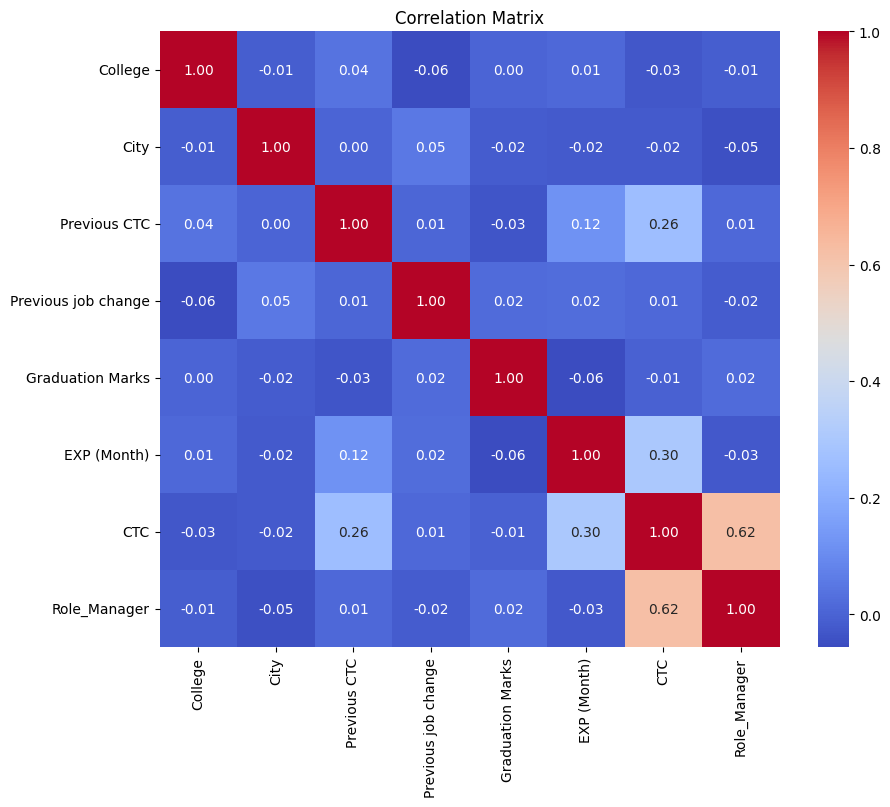

In [21]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Conclusion on detection of Outliers:

As we see that there were such no extreme outliers present in our dataset that can make any huge difference in machine learning model. Also from describe function it is clear that there is no extreme outliers.

As seen above in "Previous CTC" and "CTC", there are some outliers but from my perspective these are not going to affect on any model.

In the Correlation Matrix figure, there are some relation between Role_manager and CTC and Previous CTC and CTC

# Applying Machine Learning models

## Train-Test Split

In [22]:
# Split the dataset into features (x_multi) and the target variable (y_multi)
x_multi = df.loc[:, df.columns != 'CTC']
y_multi = df['CTC']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_multi, y_multi, test_size = 0.2, random_state = 0)
y_test

900     67487.61
427     72477.67
219     75535.50
1101    82986.23
748     73093.09
          ...   
379     94600.05
963     77795.84
878     79412.09
442     53020.32
231     66774.11
Name: CTC, Length: 318, dtype: float64

In [23]:
# Print the shapes of the training and testing sets to confirm the split
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1271, 7) (318, 7) (1271,) (318,)


# Linear Regression

In [24]:
# Add a constant term to perform linear regression
x = sn.add_constant(df['EXP (Month)'])

# Create an Ordinary Least Squares (OLS) model and fit it to the data
lm = sn.OLS(df['CTC'], x).fit()

# Display a summary of the linear regression model, including statistics and coefficients.
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CTC   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     158.2
Date:                Thu, 10 Oct 2024   Prob (F-statistic):           1.16e-34
Time:                        11:43:05   Log-Likelihood:                -17180.
No. Observations:                1589   AIC:                         3.436e+04
Df Residuals:                    1587   BIC:                         3.437e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        6.486e+04    886.559     73.164      0.000    6.31e+04    6.66e+04
EXP (Month)   268.6413     21.356     12.579      0.000     226.753     310.530
==============================================================================
Omnibus:                      313.198   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              540.318
Skew:                           1.256   Prob(JB):                    4.69e-118
Kurtosis:                       4.361   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Multiple Linear Regression

In [25]:
# Create a Linear Regression model
lm_multi = LinearRegression()

# Fit the model to the training data
lm_multi.fit(x_train, y_train)

# Predicting values for the training and test datasets using a multiple linear regression model.
y_train_lm_multi = lm_multi.predict(x_train)
y_test_lm_multi = lm_multi.predict(x_test)

# Calculating the R-squared (coefficient of determination) scores for the training and test datasets.
r2_lm_multi_train = r2_score(y_train, y_train_lm_multi)
r2_lm_multi_test = r2_score(y_test, y_test_lm_multi)

# Calculating the Mean Squared Error (MSE) for the training and test datasets.
mse_lm_multi_train = mean_squared_error(y_train, y_train_lm_multi)
mse_lm_multi_test = mean_squared_error(y_test, y_test_lm_multi)

#print the result
print("Linear Regression:")
print(f"R-squared (R^2) - Train: {r2_lm_multi_train:.4f}, Test: {r2_lm_multi_test:.4f}")
print(f"Mean Squared Error (MSE) - Train: {mse_lm_multi_train:.4f}, Test: {mse_lm_multi_test:.4f}\n")

Linear Regression:
R-squared (R^2) - Train: 0.5331, Test: 0.5356
Mean Squared Error (MSE) - Train: 75086299.7366, Test: 68909870.6995



# Ridge Regression

Standardize data

In [26]:
# Standardize the data using StandardScaler from scikit-learn
scaler = preprocessing.StandardScaler().fit(x_train)
x_train_s = scaler.transform(x_train)
x_test_s = scaler.transform(x_test)

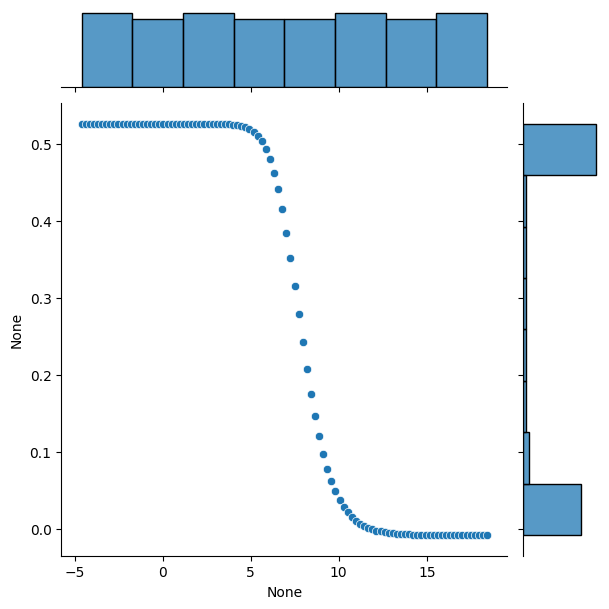

In [27]:
# Define a range of alpha values for Ridge regression
param_range = np.logspace(-2, 8, 100)

# Perform cross-validated validation curve to find the best alpha for Ridge regression
train_scores, valid_scores = validation_curve(
    Ridge(), x_train_s, y_train, param_name="alpha", param_range=param_range, cv=5, scoring='r2')

# Calculate mean R-squared scores for training and validation sets
train_mean = np.mean(train_scores, axis = 1)
test_mean = np.mean(valid_scores, axis = 1)

# Create a joint plot to visualize the relationship between log(alpha) and R-squared
sns.jointplot(x=np.log(param_range), y=test_mean)

In [28]:
# Find the alpha value with the highest validation R-squared
np.where(test_mean==max(test_mean))

# Train a Ridge regression model with the best alpha
lm_r_best = Ridge(alpha = param_range[30])
lm_r_best.fit(x_train_s, y_train)

Ridge(alpha=10.722672220103231)

In [29]:
# Predicting values for the training and test datasets using a Ridge regression model with the best hyperparameters.
y_train_lm_r_best = lm_r_best.predict(x_train_s)
y_test_lm_r_best = lm_r_best.predict(x_test_s)

# Calculating the R-squared (coefficient of determination) scores for the training and test datasets.
r2_lm_r_best_train = r2_score(y_train, y_train_lm_r_best)
r2_lm_r_best_test = r2_score(y_test, y_test_lm_r_best)

# Calculating the Mean Squared Error (MSE) for the training and test datasets.
mse_lm_r_best_train = mean_squared_error(y_train, y_train_lm_r_best)
mse_lm_r_best_test = mean_squared_error(y_test, y_test_lm_r_best)

# Print the results
print("Ridge Regression:")
print(f"R-squared (R^2) - Train: {r2_lm_r_best_train:.4f}, Test: {r2_lm_r_best_test:.4f}")
print(f"Mean Squared Error (MSE) - Train: {mse_lm_r_best_train:.4f}, Test: {mse_lm_r_best_test:.4f}\n")

Ridge Regression:
R-squared (R^2) - Train: 0.5331, Test: 0.5353
Mean Squared Error (MSE) - Train: 75091940.4707, Test: 68959112.9972



## Lasso regression

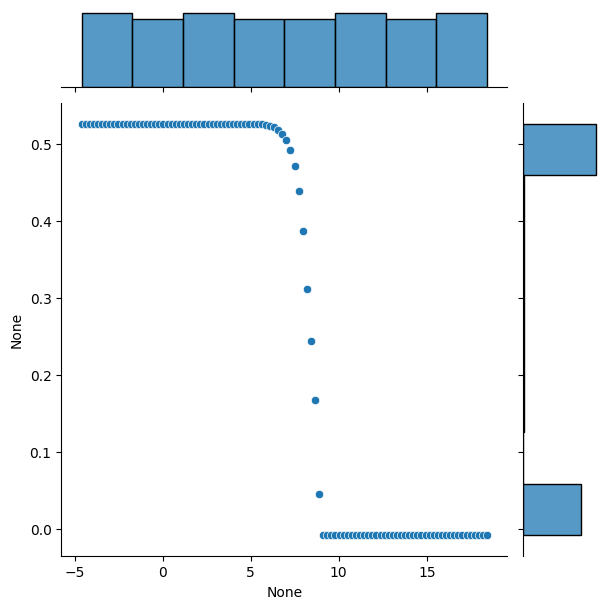

In [30]:
# Define a range of alpha values for Lasso regression
param_range2 = np.logspace(-2,8,100)

# Perform cross-validated validation curve to find the best alpha for Lasso regression
train_score_l, valid_score_l = validation_curve(Lasso(), x_train_s, y_train, param_name="alpha", param_range = param_range2, cv=5, scoring='r2')

# Calculate mean R-squared scores for training and validation sets with Lasso regression
train_mean_l = np.mean(train_score_l, axis=1)
test_mean_l = np.mean(valid_score_l, axis=1)

#Create a joint plot to visualize the relationship between log(alpha) and R-squared
sns.jointplot(x=np.log(param_range2), y=test_mean_l)

In [31]:
# Identify the alpha value with the highest R-squared
np.where(test_mean_l==max(test_mean_l))

# Train a Lasso regression model with the best alpha
lm_l_best = Lasso(alpha = param_range2[39])
lm_l_best.fit(x_train_s, y_train)

Lasso(alpha=86.97490026177834)

In [32]:
# Predicting values for the training and test datasets using a Lasso regression model with the best hyperparameters.
y_train_lm_l_best = lm_l_best.predict(x_train_s)
y_test_lm_l_best = lm_l_best.predict(x_test_s)

# Calculating the R-squared (coefficient of determination) scores for the training and test datasets.
r2_lm_l_best_train = r2_score(y_train, y_train_lm_l_best)
r2_lm_l_best_test = r2_score(y_test, y_test_lm_l_best)

# Calculating the Mean Squared Error (MSE) for the training and test datasets.
mse_lm_l_best_train = mean_squared_error(y_train, y_train_lm_l_best)
mse_lm_l_best_test = mean_squared_error(y_test, y_test_lm_l_best)

# Print the results
print("Lasso Regression:")
print(f"R-squared (R^2) - Train: {r2_lm_l_best_train:.4f}, Test: {r2_lm_l_best_test:.4f}")
print(f"Mean Squared Error (MSE) - Train: {mse_lm_l_best_train:.4f}, Test: {mse_lm_l_best_test:.4f}\n")

Lasso Regression:
R-squared (R^2) - Train: 0.5328, Test: 0.5364
Mean Squared Error (MSE) - Train: 75137394.2903, Test: 68785783.2377



## Decision Tree Regressor

In [33]:
# Create a DecisionTreeRegressor with a maximum depth of 3 and fit it to the training data
regtree = tree.DecisionTreeRegressor(max_depth = 3)
regtree.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [34]:
# Predicting values for the training and test datasets using a regression tree model.
y_train_regtree = regtree.predict(x_train)
y_test_regtree = regtree.predict(x_test)

# Calculating the R-squared (coefficient of determination) scores for the training and test datasets.
r2_regtree_train = r2_score(y_train, y_train_regtree)
r2_regtree_test = r2_score(y_test, y_test_regtree)

# Calculating the Mean Squared Error (MSE) for the training and test datasets.
mse_regtree_train = mean_squared_error(y_train, y_train_regtree)
mse_regtree_test = mean_squared_error(y_test, y_test_regtree)

# Print the results
print("Decision Tree Regression:")
print(f"R-squared (R^2) - Train: {r2_regtree_train:.4f}, Test: {r2_regtree_test:.4f}")
print(f"Mean Squared Error (MSE) - Train: {mse_regtree_train:.4f}, Test: {mse_regtree_test:.4f}\n")

Decision Tree Regression:
R-squared (R^2) - Train: 0.6137, Test: 0.5928
Mean Squared Error (MSE) - Train: 62125086.3121, Test: 60424631.0261



## Decision Tree Regression with GridSearchCV

In [35]:
# Define the hyperparameters and their possible values
param_grid = {
    'max_depth': [2, 3, 4, 5],  # List of possible maximum depths
    'min_samples_split': [2,4, 5,6, 10],  # List of possible values for minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4,6,8]  # List of possible values for minimum samples required at a leaf node
}

# Create a DecisionTreeRegressor
regtree_gs = tree.DecisionTreeRegressor()

# Create the GridSearchCV object
grid_search = GridSearchCV(regtree_gs, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the GridSearchCV to the training data
grid_search.fit(x_train, y_train)

# Print the best hyperparameters and corresponding mean squared error
print("Best Hyperparameters: ", grid_search.best_params_)

# Get the best estimator (DecisionTreeRegressor) with the best hyperparameters
best_regtree = grid_search.best_estimator_

# Use the best estimator to make predictions
y_train_pred = best_regtree.predict(x_train)
y_test_pred = best_regtree.predict(x_test)

# Calculate the R-squared scores for training data
r2_train_dt = r2_score(y_train, y_train_pred)

# Calculate the R-squared scores for testing data
r2_test_dt = r2_score(y_test, y_test_pred)

# Calculate the Mean Squared Error for training data
mse_train_dt = mean_squared_error(y_train, y_train_pred)

# Calculate the Mean Squared Error for testing data
mse_test_dt = mean_squared_error(y_test, y_test_pred)

# Print the results
print("Decision Tree Regression With GridSearchCV:")
print(f"R-squared (R^2) - Train: {r2_train_dt:.4f}, Test: {r2_test_dt:.4f}")
print(f"Mean Squared Error (MSE) - Train: {mse_train_dt:.4f}, Test: {mse_test_dt:.4f}\n")

Best Hyperparameters:  {'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}
Decision Tree Regression With GridSearchCV:
R-squared (R^2) - Train: 0.6398, Test: 0.6032
Mean Squared Error (MSE) - Train: 57933285.6436, Test: 58875901.6901



## Random Forest Regressor

In [36]:
# Define the hyperparameters and their possible values
param_grid = {
    'n_estimators': [100,  300],  # Number of trees in the forest
    'max_depth': [20, 30],  # Maximum depth of the trees
    'min_samples_split': [5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [ 2, 4]  # Minimum samples required at a leaf node
}

# Create a RandomForestRegressor
rf_gs = RandomForestRegressor()

# Create the GridSearchCV object
grid_search = GridSearchCV(rf_gs, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the GridSearchCV to the training data
grid_search.fit(x_train, y_train)

# Print the best hyperparameters and corresponding mean squared error
print("Best Hyperparameters: ", grid_search.best_params_)

# Get the best estimator (RandomForestRegressor) with the best hyperparameters
best_rf = grid_search.best_estimator_

# Use the best estimator to make predictions
y_train_pred = best_rf.predict(x_train)
y_test_pred = best_rf.predict(x_test)

# Calculate the R-squared scores for training data
r2_train_rf = r2_score(y_train, y_train_pred)

# Calculate the R-squared scores for testing data
r2_test_rf = r2_score(y_test, y_test_pred)

# Calculate the Mean Squared Error for training data
mse_train_rf = mean_squared_error(y_train, y_train_pred)

# Calculate the Mean Squared Error for testing data
mse_test_rf = mean_squared_error(y_test, y_test_pred)

# Print the results
print("Random Forest Regressor:")
print(f"R-squared (R^2) - Train: {r2_train_rf:.4f}, Test: {r2_test_rf:.4f}")
print(f"Mean Squared Error (MSE) - Train: {mse_train_rf:.4f}, Test: {mse_test_rf:.4f}\n")

Best Hyperparameters:  {'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}
Random Forest Regressor:
R-squared (R^2) - Train: 0.8973, Test: 0.6551
Mean Squared Error (MSE) - Train: 16518254.6464, Test: 51174778.1652



In [37]:
# Splitting data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Define the RandomForestRegressor with the best hyperparameters
best_rf = RandomForestRegressor(n_estimators=300, max_depth=30, min_samples_split=5, min_samples_leaf=2)

# Fit the model on the training data
best_rf.fit(x_train, y_train)

# Make predictions on training and testing sets
y_train_pred = best_rf.predict(x_train)
y_test_pred = best_rf.predict(x_test)

# Calculate R-squared scores for training and testing data
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculate Mean Squared Error for training and testing data
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Print the results
print(f"R-squared (R^2) - Train: {r2_train:.4f}, Test: {r2_test:.4f}")
print(f"Mean Squared Error (MSE) - Train: {mse_train:.4f}, Test: {mse_test:.4f}\n")

# Perform cross-validation to calculate training and validation scores
cv_scores = cross_val_score(best_rf, x_train, y_train, cv=5, scoring='r2')
cv_mse = -cross_val_score(best_rf, x_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Calculate mean R-squared and MSE for cross-validation
mean_cv_r2 = cv_scores.mean()
mean_cv_mse = cv_mse.mean()

# Print cross-validation results
print(f"Mean R-squared (R2) for Cross-Validation: {mean_cv_r2:.4f}")
print(f"Mean Mean Squared Error (MSE) for Cross-Validation: {mean_cv_mse:.4f}")

R-squared (R^2) - Train: 0.8948, Test: 0.5861
Mean Squared Error (MSE) - Train: 17204683.8636, Test: 59384590.6568

Mean R-squared (R2) for Cross-Validation: 0.6017
Mean Mean Squared Error (MSE) for Cross-Validation: 64555058.8635


## XG Boost Regressor

In [38]:
from xgboost import XGBRegressor

In [39]:
# Define the hyperparameters and their possible values
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of boosting rounds
    'max_depth': [3, 4, 5],  # Maximum depth of the trees
    'learning_rate': [0.01, 0.1, 0.2],  # Learning rate
    'min_child_weight': [1, 2, 3],  # Minimum sum of instance weight (hessian) needed in a child
}

# Create an XGBRegressor
xgb_gs = XGBRegressor()

# Create the GridSearchCV object with R2 scoring
grid_search = GridSearchCV(xgb_gs, param_grid, cv=5, scoring='r2', n_jobs=-1)

# Fit the GridSearchCV to the training data
grid_search.fit(x_train, y_train)

# Print the best hyperparameters and corresponding R-squared
print("Best Hyperparameters: ", grid_search.best_params_)

best_xgb_param = grid_search.best_params_
# Get the best estimator (XGBRegressor) with the best hyperparameters
best_xgb = grid_search.best_estimator_

# Use the best estimator to make predictions
y_train_pred = best_xgb.predict(x_train)
y_test_pred = best_xgb.predict(x_test)

# Calculate the R-squared scores for training data
r2_train_xgb = r2_score(y_train, y_train_pred)

# Calculate the R-squared scores for testing data
r2_test_xgb = r2_score(y_test, y_test_pred)

# Calculate the Mean Squared Error for training data
mse_train_xgb = mean_squared_error(y_train, y_train_pred)

# Calculate the Mean Squared Error for testing data
mse_test_xgb = mean_squared_error(y_test, y_test_pred)

# Print the results
print("XG Boost Regressor:")
print(f"R-squared (R^2) - Train: {r2_train_xgb:.4f}, Test: {r2_test_xgb:.4f}")
print(f"Mean Squared Error (MSE) - Train: {mse_train_xgb:.4f}, Test: {mse_test_xgb:.4f}\n")

Best Hyperparameters:  {'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 300}
XG Boost Regressor:
R-squared (R^2) - Train: 0.6531, Test: 0.5930
Mean Squared Error (MSE) - Train: 56711969.5229, Test: 58393410.5962



## Bagging Regressor

In [40]:
# Create a base regression model
base_model = DecisionTreeRegressor()

# Create a BaggingRegressor with the base model
bagging_reg = BaggingRegressor(base_model, random_state=0)

# Define the hyperparameters and their possible values
param_grid = {
    'n_estimators': [50, 100, 150, 200]  # List of possible numbers of base models
}

# Create the GridSearchCV object
grid_search = GridSearchCV(bagging_reg, param_grid, cv=5, scoring='r2', n_jobs=-1)

# Fit the GridSearchCV to the training data
grid_search.fit(x_train, y_train)

# Print the best hyperparameters and corresponding mean squared error
print("Best Hyperparameters: ", grid_search.best_params_)

# Get the best estimator (BaggingRegressor) with the best hyperparameters
best_bagging_reg = grid_search.best_estimator_

# Use the best estimator to make predictions
y_train_pred = best_bagging_reg.predict(x_train)
y_test_pred = best_bagging_reg.predict(x_test)

# Calculate the R-squared scores for training data
r2_train_bagging_reg = r2_score(y_train, y_train_pred)

# Calculate the R-squared scores for testing data
r2_test_bagging_reg = r2_score(y_test, y_test_pred)

# Calculate the Mean Squared Error for training data
mse_train_bagging_reg = mean_squared_error(y_train, y_train_pred)
mse_test_bagging_reg = mean_squared_error(y_test, y_test_pred)

# Print the results
print("Bagging Regressorr:")
print(f"R-squared (R^2) - Train: {r2_train_bagging_reg:.4f}, Test: {r2_test_bagging_reg:.4f}")
print(f"Mean Squared Error (MSE) - Train: {mse_train_bagging_reg:.4f}, Test: {mse_test_bagging_reg:.4f}\n")

Best Hyperparameters:  {'n_estimators': 200}
Bagging Regressorr:
R-squared (R^2) - Train: 0.9458, Test: 0.5930
Mean Squared Error (MSE) - Train: 8867961.0181, Test: 58404717.3167



In [41]:
# Function to colorize values based on a threshold
from tabulate import tabulate
from colorama import Fore, Style
def colorize(value, threshold=0.6):
    if value < threshold:
        return f"{Fore.RED}{value:.4f}{Style.RESET_ALL}"
    return f"{Fore.GREEN}{value:.4f}{Style.RESET_ALL}"

# Define your headings
headings = ["Model", "R-squared (Train)", "R-squared (Test)", "MSE (Train)", "MSE (Test)"]

# Data for the table
data = [
    ["Linear Regression", colorize(r2_lm_multi_train), colorize(r2_lm_multi_test), colorize(mse_lm_multi_train), colorize(mse_lm_multi_test)],
    ["Ridge Regression", colorize(r2_lm_r_best_train), colorize(r2_lm_r_best_test), colorize(mse_lm_r_best_train), colorize(mse_lm_r_best_test)],
    ["Lasso Regression", colorize(r2_lm_l_best_train), colorize(r2_lm_l_best_test), colorize(mse_lm_l_best_train), colorize(mse_lm_l_best_test)],
    ["Decision Tree Regression", colorize(r2_regtree_train), colorize(r2_regtree_test), colorize(mse_regtree_train), colorize(mse_regtree_test)],
    ["Decision Tree with GridSearchCV", colorize(r2_train_dt), colorize(r2_test_dt), colorize(mse_train_dt), colorize(mse_test_dt)],
    ["Random Forest Regressor", colorize(r2_train_rf), colorize(r2_test_rf), colorize(mse_train_rf), colorize(mse_test_rf)],
    ["XG Boost Regressor", colorize(r2_train_xgb), colorize(r2_test_xgb), colorize(mse_train_xgb), colorize(mse_test_xgb)],
    ["Bagging Regressor", colorize(r2_train_bagging_reg), colorize(r2_test_bagging_reg), colorize(mse_train_bagging_reg), colorize(mse_test_bagging_reg)],
]

# Print the table
table = tabulate(data, headers=headings, tablefmt="fancy_grid")
print(table)

╒═════════════════════════════════╤═════════════════════╤════════════════════╤═══════════════╤══════════════╕
│ Model                           │   R-squared (Train) │   R-squared (Test) │   MSE (Train) │   MSE (Test) │
╞═════════════════════════════════╪═════════════════════╪════════════════════╪═══════════════╪══════════════╡
│ Linear Regression               │              0.5331 │             0.5356 │   7.50863e+07 │  6.89099e+07 │
├─────────────────────────────────┼─────────────────────┼────────────────────┼───────────────┼──────────────┤
│ Ridge Regression                │              0.5331 │             0.5353 │   7.50919e+07 │  6.89591e+07 │
├─────────────────────────────────┼─────────────────────┼────────────────────┼───────────────┼──────────────┤
│ Lasso Regression                │              0.5328 │             0.5364 │   7.51374e+07 │  6.87858e+07 │
├─────────────────────────────────┼─────────────────────┼────────────────────┼───────────────┼──────────────┤
│ Decision

## Decision and Justification

Based on the results, the Random Forest Regressor with the hyperparameters (max_depth=30, n_estimators=300) is the best performer for predicting the target variable.

Here are the reasons for choosing this model:

R-squared (R^2): The Random Forest Regressor achieves the highest R-squared value on the test dataset (0.6551) among all the models, indicating its strong predictive power and its ability to explain a significant portion of the variance in the target variable.

Mean Squared Error (MSE): The Random Forest Regressor has the lowest test MSE (51174778.1652) compared to all other models, indicating that its predictions are closest to the actual values and that it provides the best fit for the data.

Hyperparameter Optimization: The Random Forest Regressor has been fine-tuned with a max depth of 30 and 300 estimators, contributing to its outstanding performance.

In conclusion, based on the results, I recommend using the Random Forest Regressor with max depth=30 and 300 estimators for your predictive tasks due to its high prediction accuracy.